In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pylab

In [ ]:
raw_csv_data = pd.read_csv("C:/Users/MUHAMMED SHAH/Desktop/Observability server data/SET 2/SERVER 1/csv_formatted.csv")
data = raw_csv_data.copy()

In [ ]:
data.isna().sum()

Unnamed: 0                 1908
timestamp                  1908
vmMemoryDemand             1908
guest_demand               1908
guest_provisioned          1908
vm_capacity_provisioned    1908
effective_limit            1908
dtype: int64

In [ ]:
data.timestamp = pd.to_datetime(data.timestamp)
data['day'] = data['timestamp'].apply(lambda x:x.weekday())
x_call = data.columns[1:-1]

In [ ]:
data.head()

,Unnamed: 0,timestamp,vmMemoryDemand,guest_demand,guest_provisioned,vm_capacity_provisioned,effective_limit,day
0,0.0,2022-11-11 19:16:00,13844401.0,3838625.00,33554432.0,16799.99805,33815464.0,4.0
1,1.0,2022-11-11 19:21:00,13832758.0,3617164.25,33554432.0,16799.99805,33815464.0,4.0
2,2.0,2022-11-11 19:26:00,13834057.0,3051213.50,33554432.0,16799.99805,33815464.0,4.0
3,3.0,2022-11-11 19:31:00,13859266.0,3764804.50,33554432.0,16799.99805,33815464.0,4.0
4,4.0,2022-11-11 19:36:00,13867352.0,3174246.25,33554432.0,16799.99805,33815464.0,4.0


In [ ]:
data = data.apply (pd.to_numeric, errors='coerce')
data = data.dropna()

In [ ]:
data.tail()

,Unnamed: 0,timestamp,vmMemoryDemand,guest_demand,guest_provisioned,vm_capacity_provisioned,effective_limit,day
49928,49928.0,1683744660000000000,15023986.0,5684120.00,33554432.0,16799.99609,33815236.0,2.0
49929,49929.0,1683744960000000000,15002012.0,4872101.50,33554432.0,16799.99609,33815236.0,2.0
49930,49930.0,1683745260000000000,14994134.0,4724462.00,33554432.0,16799.99609,33815236.0,2.0
49931,49931.0,1683745560000000000,14986520.0,3764803.75,33554432.0,16799.99609,33815236.0,2.0
49932,49932.0,1683745860000000000,14977126.0,4503002.00,33554432.0,16799.99609,33815236.0,2.0


In [ ]:
data_fix = pd.DataFrame({'total memory':np.sum(data[x_call]).values})
data_fix['average per day']=data[x_call].mean().values
data_fix['% Monday']=data[data['day']==0][x_call].sum().values/data_fix['total memory']*100
data_fix['% Tuesday']=data[data['day']==1][x_call].sum().values/data_fix['total memory']*100
data_fix['% Wednesday']=data[data['day']==2][x_call].sum().values/data_fix['total memory']*100
data_fix['% Thursday']=data[data['day']==3][x_call].sum().values/data_fix['total memory']*100
data_fix['% Friday']=data[data['day']==4][x_call].sum().values/data_fix['total memory']*100
data_fix['% Saturday']=data[data['day']==5][x_call].sum().values/data_fix['total memory']*100
data_fix['% Sunday']=data[data['day']==6][x_call].sum().values/data_fix['total memory']*100
data_fix['% weekday']=data[(data['day']!=5)&(data['day']!=6)][x_call].sum().values/data_fix['total memory']*100
data_fix['% weekend']=data[(data['day']==5)|(data['day']==6)][x_call].sum().values/data_fix['total memory']*100

In [ ]:
data_fix.head()

,total memory,average per day,% Monday,% Tuesday,% Wednesday,% Thursday,% Friday,% Saturday,% Sunday,% weekday,% weekend
0,-1.132808e+18,1.676081e+18,97.397416,-102.203826,-128.665931,427.453935,218.303822,407.700656,808.423352,512.285415,-412.285415
1,7.310613e+11,1.464084e+07,15.116000,14.498979,13.913406,13.506379,13.208740,14.747454,15.009042,70.243504,29.756496
2,2.638065e+11,5.283209e+06,15.547615,19.385130,13.050710,12.649504,11.961036,12.810748,14.595256,72.593996,27.406004
3,1.675473e+12,3.355443e+07,14.391284,14.393287,14.217051,13.968718,13.860573,14.609577,14.559510,70.830913,29.169087
4,8.388743e+08,1.680000e+04,14.391284,14.393287,14.217051,13.968718,13.860573,14.609577,14.559510,70.830913,29.169087


In [ ]:
data_fix.isna().sum()

total memory       0
average per day    0
% Monday           0
% Tuesday          0
% Wednesday        0
% Thursday         0
% Friday           0
% Saturday         0
% Sunday           0
% weekday          0
% weekend          0
dtype: int64

In [ ]:
data_fix

,total memory,average per day,% Monday,% Tuesday,% Wednesday,% Thursday,% Friday,% Saturday,% Sunday,% weekday,% weekend
0,7.310613e+11,1.464084e+07,15.116000,14.498979,13.913406,13.506379,13.208740,14.747454,15.009042,70.243504,29.756496
1,2.638065e+11,5.283209e+06,15.547615,19.385130,13.050710,12.649504,11.961036,12.810748,14.595256,72.593996,27.406004
2,1.675473e+12,3.355443e+07,14.391284,14.393287,14.217051,13.968718,13.860573,14.609577,14.559510,70.830913,29.169087
3,8.388743e+08,1.680000e+04,14.391284,14.393287,14.217051,13.968718,13.860573,14.609577,14.559510,70.830913,29.169087
4,1.688119e+12,3.380769e+07,14.393263,14.392230,14.215404,13.967366,13.858003,14.611415,14.562318,70.826267,29.173733


In [ ]:
#STANDARDIZATION OF DATA

from sklearn.preprocessing import StandardScaler
x_calls = data_fix.columns[1:]
scaller = StandardScaler()
matrix = pd.DataFrame(scaller.fit_transform(data_fix[x_calls]),columns=x_calls)
print(matrix.head())

   average per day  % Monday  % Tuesday  % Wednesday  % Thursday  % Friday  \
0        -0.200719  0.724866  -0.459860    -0.020638   -0.205962 -0.190929   
1        -0.866827  1.623610   1.999573    -1.931227   -1.874705 -1.879914   
2         1.145613 -0.784199  -0.513060     0.651837    0.694433  0.691441   
3        -1.241707 -0.784199  -0.513060     0.651837    0.694433  0.691441   
4         1.163640 -0.780079  -0.513592     0.648190    0.691800  0.687962   

   % Saturday  % Sunday  % weekday  % weekend  
0    0.638676  1.994121  -1.030361   1.030361  
1   -1.994767 -0.350593   1.917317  -1.917317  
2    0.451197 -0.553147  -0.293709   0.293709  
3    0.451197 -0.553147  -0.293709   0.293709  
4    0.453697 -0.537235  -0.299537   0.299537  


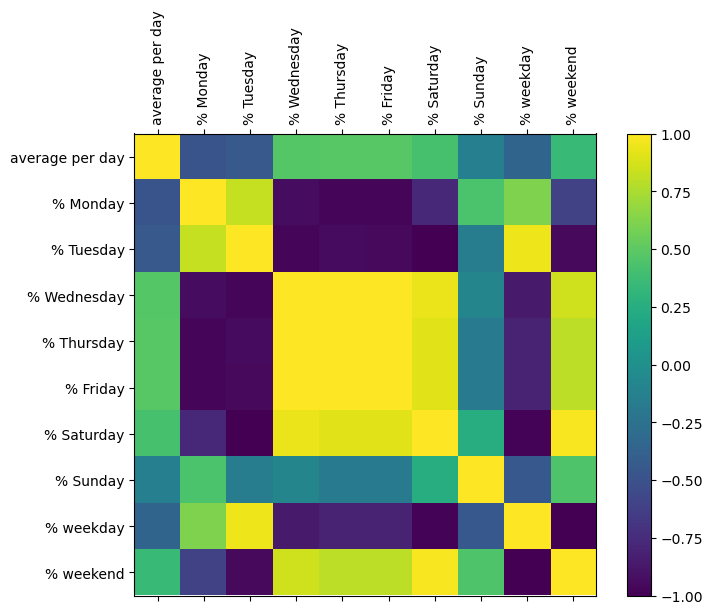

In [ ]:
#CORRELATION

corr = matrix[x_calls].corr()
fig, ax = plt.subplots(figsize=(8, 6))
cax=ax.matshow(corr,vmin=-1,vmax=1)
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.xticks(rotation=90)
plt.colorbar(cax)

In [ ]:
data.day

0        4
1        4
2        4
3        4
4        4
        ..
49928    2
49929    2
49930    2
49931    2
49932    2
Name: day, Length: 49933, dtype: int64

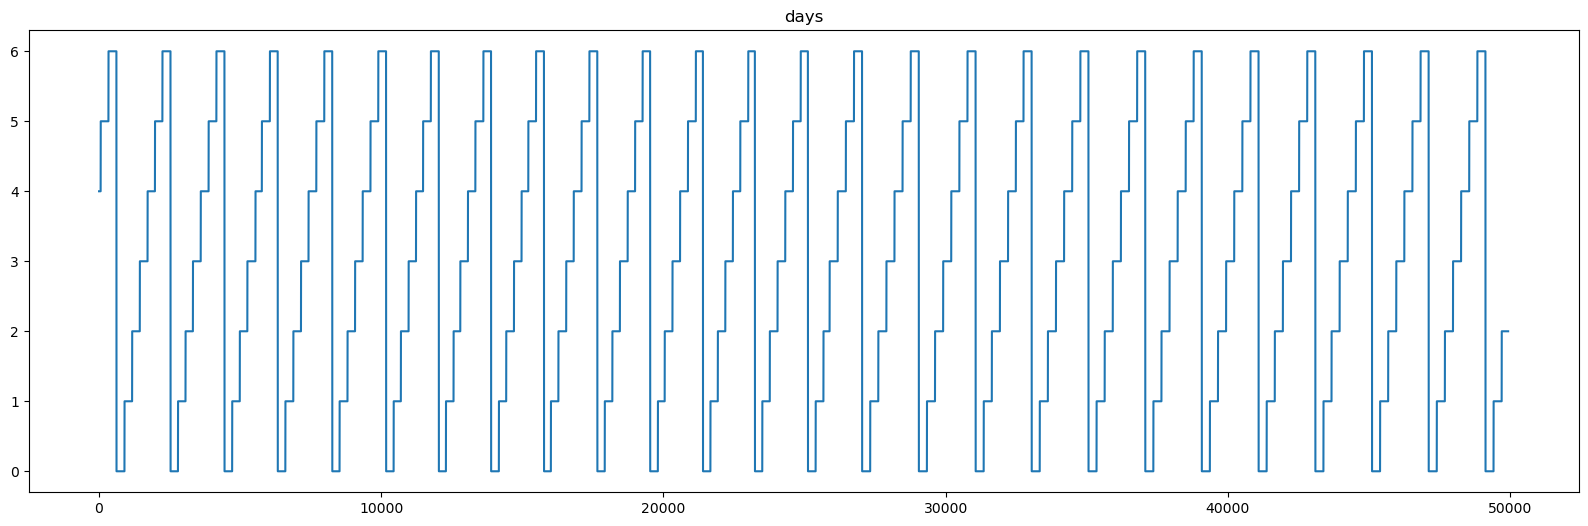

In [ ]:
plt.figure(figsize=(20,6))
plt.title("days")
data.day.plot()
plt.show()

In [ ]:
#vmMemoryDemand stats

In [ ]:
# x_call_1 = data.columns[1:3]

In [ ]:
# data_fix_1 = pd.DataFrame({'total vmMemoryDemand':np.sum(data[x_call]).values})
# data_fix_1['average per day']=data[x_call].mean().values
# data_fix_1['% Monday']=data[data['day']==0][x_call].sum().values/data_fix_1['total vmMemoryDemand']*100
# data_fix_1['% Tuesday']=data[data['day']==1][x_call].sum().values/data_fix_1['total vmMemoryDemand']*100
# data_fix_1['% Wednesday']=data[data['day']==2][x_call].sum().values/data_fix_1['total vmMemoryDemand']*100
# data_fix_1['% Thursday']=data[data['day']==3][x_call].sum().values/data_fix_1['total vmMemoryDemand']*100
# data_fix_1['% Friday']=data[data['day']==4][x_call].sum().values/data_fix_1['total vmMemoryDemand']*100
# data_fix_1['% Saturday']=data[data['day']==5][x_call].sum().values/data_fix_1['total vmMemoryDemand']*100
# data_fix_1['% Sunday']=data[data['day']==6][x_call].sum().values/data_fix_1['total vmMemoryDemand']*100
# data_fix_1['% weekday']=data[(data['day']!=5)&(data['day']!=6)][x_call].sum().values/data_fix_1['total vmMemoryDemand']*100
# data_fix_1['% weekend']=data[(data['day']==5)|(data['day']==6)][x_call].sum().values/data_fix_1['total vmMemoryDemand']*100

In [ ]:
# data_fix_1

,total vmMemoryDemand,average per day,% Monday,% Tuesday,% Wednesday,% Thursday,% Friday,% Saturday,% Sunday,% weekday,% weekend
0,-1.132808e+18,1.676081e+18,97.397416,-102.203826,-128.665931,427.453935,218.303822,407.700656,808.423352,512.285415,-412.285415
1,7.310613e+11,1.464084e+07,15.116000,14.498979,13.913406,13.506379,13.208740,14.747454,15.009042,70.243504,29.756496
2,2.638065e+11,5.283209e+06,15.547615,19.385130,13.050710,12.649504,11.961036,12.810748,14.595256,72.593996,27.406004
3,1.675473e+12,3.355443e+07,14.391284,14.393287,14.217051,13.968718,13.860573,14.609577,14.559510,70.830913,29.169087
4,8.388743e+08,1.680000e+04,14.391284,14.393287,14.217051,13.968718,13.860573,14.609577,14.559510,70.830913,29.169087
5,1.688119e+12,3.380769e+07,14.393263,14.392230,14.215404,13.967366,13.858003,14.611415,14.562318,70.826267,29.173733
